# Final Capstone - Battle of  Neighborhoods of Delhi

In [1]:
from sklearn.cluster import KMeans  # Cluster Algorithm calculations
import requests # Library for requests
import pandas as pd # library for data analysis
import numpy as np  # handels vector data
from  bs4 import BeautifulSoup  # scrapping the website
from IPython.display import display_html
from pandas.io.json import json_normalize # convert JSON file to Pandas dataframe
#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # Address to Latitiude & Longitude
import matplotlib.cm as cm  # plotting modules
import matplotlib.colors as colors  # colors
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
! pip install folium  # for visual maps
import folium
print("Folium installed")
print("Libraries setup")

     |████████████████████████████████| 102kB 9.0MB/s ta 0:00:011
Folium installed
Libraries setup


In [2]:
Web_url= requests.get('https://en.wikipedia.org/wiki/Neighbourhoods_of_Delhi').text # wikipedia page on Delhi
soup=BeautifulSoup(Web_url, 'lxml') # using lxml for parsing the html
division = soup.find('div', class_="mw-parser-output" ) # delhi divisions html 
print("Web Page successfully loaded")
print(soup.prettify())

Web Page successfully loaded
<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   Neighbourhoods of Delhi - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"Xstp-gpAEKAAAI0oPYMAAACV","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Neighbourhoods_of_Delhi","wgTitle":"Neighbourhoods of Delhi","wgCurRevisionId":951146027,"wgRevisionId":951146027,"wgArticleId":7375737,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Use dmy dates from December 2018","Use Indian English from January 2016","All Wikipedia articles written

In [3]:
# Extracting relevant data from HTML code structure i.e Borough and Neighborhoods (Actually Delhi has Districts and Subdistricts)
 data = pd.DataFrame(columns=['Borough','Neighborhood'])
 v=-1
 flag = False  # initialize the initial event
 no = 0
 borough_temp = None  # initialize the var to NULL
# Using Childeren nodes in html to extract info
 for child in division.children:
     if child.name:
         span = child.find('span')
         if span!=-1 and span is not None:
             try:
                 if span['class'][0] == 'mw-headline' and child.a.text!='edit':
                     borough_temp = child.a.text
                     v+=1
                     flag = True
                     continue
             except KeyError:
                 continue
         if child.name=='ul' and flag==True:   # orderd list extraction
             neighborhood = []
             for ch in child.children:
                
                 try:
                     data.loc[no]=[borough_temp,ch.text]
                     no +=1
                 except AttributeError:
                     pass
         flag = False
        
 data[0:10] # First ten rows

,Borough,Neighborhood
0,North West Delhi,Adarsh Nagar
1,North West Delhi,Ashok Vihar
2,North West Delhi,Azadpur
3,North West Delhi,Bawana
4,North West Delhi,Begum Pur
5,North West Delhi,Dhaka
6,North West Delhi,Jahangirpuri
7,North West Delhi,Karala
8,North West Delhi,Keshav Puram
9,North West Delhi,Kingsway Camp


In [4]:
ll = pd.DataFrame(columns=['latitude','longitude']) # Finding Lat and Long
geolocator = Nominatim(user_agent="Delhi_explorer") # using Nominatim to  find the cordinates
for i in range(185):  # 185 is number of rows in the webscrapped file
     address = data['Neighborhood'].loc[i]+', New Delhi'
     try: 
         location = geolocator.geocode(address)
         ll.loc[i]=[location.latitude,location.longitude]
     except AttributeError:
         continue

In [6]:
df1 = data # data from the wikipedia using BeautifulSoup
df2 = ll  # Latitiude and Longitude Data
Delhi_neighborhood_data = pd.concat([df1, df2], axis=1) # Concating the two datas to creat a single pandas dataframe
Delhi_neighborhood_data.to_csv(r'C:\Prahlad\Desktop\FINAL_CAPSTONE_IBM\Delhi_dataSet.csv') # saving thee file the local folder
print("file saved")

file saved


In [7]:
delhi_neighborhood_data = pd.read_csv('C:\Prahlad\Desktop\FINAL_CAPSTONE_IBM\Delhi_dataSet.csv') # loading the file
delhi_neighborhood_data.dropna(inplace=True) # dropping all  records with NaN values
delhi_neighborhood_data.reset_index(inplace=True)
delhi_neighborhood_data.drop(['index','Unnamed: 0'], axis=1, inplace=True) # dropped unnamed:0 column as it serves no purpose
delhi_neighborhood_data.head()

,Borough,Neighborhood,latitude,longitude
0,North West Delhi,Adarsh Nagar,28.714401,77.167288
1,North West Delhi,Ashok Vihar,28.699453,77.184826
2,North West Delhi,Azadpur,28.707657,77.175547
3,North West Delhi,Bawana,28.799660,77.032885
4,North West Delhi,Dhaka,28.708698,77.205749


In [8]:
delhi_neighborhood_data.shape

(165, 4)

In [9]:
delhi_neighborhood_data.dtypes

Borough          object
Neighborhood     object
latitude        float64
longitude       float64
dtype: object

In [10]:
delhi_neighborhood_data.info

<bound method DataFrame.info of               Borough        Neighborhood   latitude  longitude
0    North West Delhi        Adarsh Nagar  28.714401  77.167288
1    North West Delhi         Ashok Vihar  28.699453  77.184826
2    North West Delhi             Azadpur  28.707657  77.175547
3    North West Delhi              Bawana  28.799660  77.032885
4    North West Delhi               Dhaka  28.708698  77.205749
5    North West Delhi        Jahangirpuri  28.725972  77.162658
6    North West Delhi              Karala  28.735140  77.032511
7    North West Delhi        Keshav Puram  28.688926  77.161683
8    North West Delhi       Kingsway Camp  28.613749  77.212133
9    North West Delhi       Kohat Enclave  28.698041  77.140539
10   North West Delhi          Model Town  39.031714 -90.261223
11   North West Delhi              Narela  28.842610  77.091835
12   North West Delhi          Pitam Pura  28.703268  77.132250
13   North West Delhi           Rani Bagh  28.685982  77.132524
14   Nor

### Finding Latitude and Longitude of Delhi using Geocode Nominatim

In [11]:
address = 'New Delhi, India'
geolocator = Nominatim(user_agent="Delhi_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Delhi City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Delhi City are 28.6141793, 77.2022662.


In [12]:
Delhi_Data=delhi_neighborhood_data

#### Map of Delhi with neighborhoods superimposed on top using folium

In [13]:
import folium

map_Delhi = folium.Map(location=[latitude, longitude], zoom_start=11) # Map of Delhi with Neighborhoods

# adding markers to map circles with blue color
for lat, lng, label in zip(Delhi_Data['latitude'],Delhi_Data['longitude'], Delhi_Data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Delhi)  
    
map_Delhi

**Defining the Foursquare Credentials Client_Id and Secret Code  and Version**

In [14]:
CLIENT_ID = '4MHLZKJMOU4XNSNNYXITLTTVAY0KWXOWEYA5KFERCNBLOZBK'
CLIENT_SECRET = '5LYM4T1ED2Q5RHBRWAGEMT2APQHPNYW3CBC5W0LU3YQK02RQ'
VERSION = '20200524'
print('Your credentails:') 
print('CLIENT_ID: ' + CLIENT_ID) 
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 4MHLZKJMOU4XNSNNYXITLTTVAY0KWXOWEYA5KFERCNBLOZBK
CLIENT_SECRET:5LYM4T1ED2Q5RHBRWAGEMT2APQHPNYW3CBC5W0LU3YQK02RQ


In [15]:
First_Neighbor = Delhi_Data.loc[0, 'Neighborhood']
print(f"The first neighborhood's name is '{First_Neighbor}'.")

The first neighborhood's name is 'Adarsh Nagar'.


**Fetching the neighborhood's latitude and longitudes values**

In [16]:
neighborhood_latitude = Delhi_Data.loc[0, 'latitude'] # neighborhood latitude value
neighborhood_longitude = Delhi_Data.loc[0, 'longitude'] # neighborhood longitude value

neighborhood_name = Delhi_Data.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Adarsh Nagar are 28.714400800000003, 77.1672884.


**Top 100 venues of Delhi located in The Business District within a radius of 500 meters.**   
**Use requests.get(url)**  

In [17]:
LIMIT=100  #The limit of venues returned by Foursquare API
radius = 500  #defines the radius from the venue

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
                                CLIENT_ID,
                                CLIENT_SECRET, 
                                VERSION, 
                                neighborhood_latitude,
                                neighborhood_longitude, 
                                radius, 
                                LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=4MHLZKJMOU4XNSNNYXITLTTVAY0KWXOWEYA5KFERCNBLOZBK&client_secret=5LYM4T1ED2Q5RHBRWAGEMT2APQHPNYW3CBC5W0LU3YQK02RQ&v=20200524&ll=28.714400800000003,77.1672884&radius=500&limit=100'

**Examine the resutls using the GET request** 

In [18]:
results = requests.get(url).json() # extract the metadata of the file
results

{'meta': {'code': 200, 'requestId': '5ecba3281d67cb0028608a21'},
 'response': {'headerLocation': 'North Delhi',
  'headerFullLocation': 'North Delhi, Delhi',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 4,
  'suggestedBounds': {'ne': {'lat': 28.71890080450001,
    'lng': 77.17240980502713},
   'sw': {'lat': 28.709900795499998, 'lng': 77.16216699497288}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4f2ba8bfe4b0ebf428456bfd',
       'name': 'Vishyavidyalaya Metro Station@Entry gate #1 n Platform # 2(Towards Jahangir puri)',
       'location': {'address': 'North Delhi',
        'crossStreet': 'Kingsway Camp Road',
        'lat': 28.71559631525242,
        'lng': 77.17098080102352,
        'labeledLatLngs': [{'label': 'display',
          'lat': 28.71

#### get_category_type function from the Foursquare lab to extract the categories of venues

In [19]:
# Extracting the category of the venue by the get_category funtion
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

**Convert the json file into a pandas dataframe -filter the columns- filter category for each row and finally clean the columns**

In [20]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter the  columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Vishyavidyalaya Metro Station@Entry gate #1 n ...,Train Station,28.715596,77.170981
1,Adarsh Nagar Metro Station,Light Rail Station,28.716598,77.170436
2,Pahalwan Dhaba,Indian Restaurant,28.714594,77.172155
3,My Idea Store,Mobile Phone Shop,28.717487,77.170922


In [21]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

4 venues were returned by Foursquare.


# 1. Explore Neighborhoods in Delhi

In [22]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
        
    # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
                CLIENT_ID, 
                CLIENT_SECRET, 
                VERSION, 
                lat, 
                lng, 
                radius, 
                LIMIT)
            
    # make the GET request
    results = requests.get(url).json()['response']['groups'][0]['items']
        
        # return only relevant information for each nearby venue
    venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

**Create a new data frame for Delhi_Venues with all Neighborhoods**

In [23]:
Delhi_venues = getNearbyVenues(names=Delhi_Data['Neighborhood'],
                                   latitudes=Delhi_Data['latitude'],
                                   longitudes=Delhi_Data['longitude'])

Adarsh Nagar
Ashok Vihar
Azadpur
Bawana
Dhaka
Jahangirpuri
Karala
Keshav Puram
Kingsway Camp
Kohat Enclave
Model Town
Narela
Pitam Pura
Rani Bagh
Rithala
Shalimar Bagh
Shakti Nagar
Bara Hindu Rao
Chandni Chowk
Chawri Bazaar
Civil Lines
Dariba Kalan
Kamla Nagar
Kashmiri Gate
Kotwali
Lahori Gate
Nehru Vihar
Paharganj
Pratap Nagar
Pul Bangash
Roshanara Bagh
Sangam Vihar
Sant Nagar
Sarai Kale Khan
Sarai Rohilla
Shakti Nagar
Shastri Nagar
Tis Hazari
Timarpur
Wazirabad
Babarpur
Dilshad Garden
Kabir Nagar
Mandoli
Maujpur
Mukherjee Nagar
Nand Nagri
Naveen Shahdara
Sadatpur
Shahdara
Sonia Vihar
Shastri Park
Yamuna Vihar
Chandni Chowk
Daryaganj
Jhandewalan
Karol Bagh
Bara Hindu Rao
Paharganj
Barakhamba Road
Chanakyapuri
Connaught Place
Gautampuri
Gole Market
Golf Links
INA Colony
Khan Market
Laxmibai Nagar
Pragati Maidan
Brij Puri
East Vinod Nagar
Gandhi Nagar
Geeta Colony
Jhilmil Colony
Krishna Nagar
Laxmi Nagar
Mayur Vihar
Pandav Nagar
Patparganj
Preet Vihar
Anand Vihar
Shakarpur
Shastri Nagar

In [24]:
Delhi_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Tilak Nagar,28.636548,77.096496,McDonald's,28.636260,77.097104,Fast Food Restaurant
1,Tilak Nagar,28.636548,77.096496,McDonald's,28.639403,77.096502,Fast Food Restaurant
2,Tilak Nagar,28.636548,77.096496,McDonald's,28.636471,77.097160,Restaurant
3,Tilak Nagar,28.636548,77.096496,Aggarwal Restaurant,28.636747,77.097177,Indian Restaurant
4,Tilak Nagar,28.636548,77.096496,Grillz Jail Road,28.635471,77.097031,Fast Food Restaurant


In [25]:
Delhi_venues.shape

(8, 7)

**Load the List of Delhi Restaurants down loaded from Kaggle**

In [26]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_88cdeb63cc334d59a0090cd41416b6e8 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='Sj-cnIBsXt9gRiOJB2uwUUp7CxAiZR9AS9NmdkuiTFn-',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_88cdeb63cc334d59a0090cd41416b6e8.get_object(Bucket='thebattleofneighborhoods-donotdelete-pr-wbgfmetou25lxn',Key='restaurant_dataSet.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
Delhi_Venues = pd.read_csv(body)
Delhi_Venues.head()


,Unnamed: 0,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,0,Adarsh Nagar,28.614193,77.071541,Eagle Boys Pizza,28.615595,77.070784,Pizza Place
1,1,Adarsh Nagar,28.614193,77.071541,Bikanerwala,28.613391,77.076084,Indian Restaurant
2,2,Adarsh Nagar,28.614193,77.071541,Bikano East Patel Nagar,28.616190,77.066978,Fast Food Restaurant
3,3,Adarsh Nagar,28.614193,77.071541,McDonald's,28.616330,77.067034,Fast Food Restaurant
4,4,Ashok Vihar,28.699453,77.184826,Nat Khat Caterers,28.699630,77.187832,Indian Restaurant


In [27]:
Delhi_Venues.shape

(849, 8)

In [28]:
import folium

map_Restaurants = folium.Map(location=[latitude, longitude], zoom_start=11) # Map of Delhi Restaurants

# add markers to map
for lat, lng, label in zip(Delhi_Venues['Venue Latitude'], Delhi_Venues['Venue Longitude'], Delhi_Venues['Venue']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius= 2,
      #  popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Restaurants)  
    
map_Restaurants

**Check the number of venues returned for each neighborhood**

In [29]:
Delhi_Venues.groupby('Neighborhood').count()

,Unnamed: 0,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,,
Adarsh Nagar,4,4,4,4,4,4,4
Alaknanda,9,9,9,9,9,9,9
Anand Vihar,6,6,6,6,6,6,6
Ashok Vihar,4,4,4,4,4,4,4
Azadpur,4,4,4,4,4,4,4
Bali Nagar,4,4,4,4,4,4,4
Bara Hindu Rao,8,8,8,8,8,8,8
Barakhamba Road,4,4,4,4,4,4,4
Brij Puri,2,2,2,2,2,2,2


**The number of UNIQUE categories created from all the returned venues above**

In [30]:
print('There are {} uniques categories.'.format(len(Delhi_Venues['Venue Category'].unique())))

There are 74 uniques categories.


# 3. Analyze Each Neighborhood

In [31]:
# one hot encoding
Delhi_onehot = pd.get_dummies(Delhi_Venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Delhi_onehot['Neighborhood'] = Delhi_Venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Delhi_onehot.columns[-1]] + list(Delhi_onehot.columns[:-1])
Delhi_onehot = Delhi_onehot[fixed_columns]

Delhi_onehot.head()

,Neighborhood,Afghan Restaurant,American Restaurant,Argentinian Restaurant,Asian Restaurant,Australian Restaurant,Awadhi Restaurant,BBQ Joint,Bagel Shop,Bakery,Bengali Restaurant,Bistro,Breakfast Spot,Buffet,Burger Joint,Burmese Restaurant,Cafeteria,Café,Chinese Restaurant,Comfort Food Restaurant,Deli / Bodega,Dhaba,Dim Sum Restaurant,Diner,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Falafel Restaurant,Fast Food Restaurant,Fish & Chips Shop,Food,Food Court,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Gastropub,Hot Dog Joint,Hyderabadi Restaurant,Indian Chinese Restaurant,Indian Restaurant,Indian Sweet Shop,Irani Cafe,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Molecular Gastronomy Restaurant,Mughlai Restaurant,Multicuisine Indian Restaurant,New American Restaurant,North Indian Restaurant,Northeast Indian Restaurant,Parsi Restaurant,Pizza Place,Portuguese Restaurant,Punjabi Restaurant,Restaurant,Sandwich Place,Scandinavian Restaurant,Snack Place,Soup Place,South Indian Restaurant,Steakhouse,Sushi Restaurant,Tapas Restaurant,Tex-Mex Restaurant,Thai Restaurant,Tibetan Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant
0,Adarsh Nagar,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Adarsh Nagar,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Adarsh Nagar,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Adarsh Nagar,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Ashok Vihar,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [32]:
Delhi_onehot.shape

(849, 75)

**Group rows by neighborhood by taking the mean of the frequency of occurrence of each category**

In [33]:
Delhi_grouped = Delhi_onehot.groupby('Neighborhood').mean().reset_index()
Delhi_grouped

,Neighborhood,Afghan Restaurant,American Restaurant,Argentinian Restaurant,Asian Restaurant,Australian Restaurant,Awadhi Restaurant,BBQ Joint,Bagel Shop,Bakery,Bengali Restaurant,Bistro,Breakfast Spot,Buffet,Burger Joint,Burmese Restaurant,Cafeteria,Café,Chinese Restaurant,Comfort Food Restaurant,Deli / Bodega,Dhaba,Dim Sum Restaurant,Diner,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Falafel Restaurant,Fast Food Restaurant,Fish & Chips Shop,Food,Food Court,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Gastropub,Hot Dog Joint,Hyderabadi Restaurant,Indian Chinese Restaurant,Indian Restaurant,Indian Sweet Shop,Irani Cafe,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Molecular Gastronomy Restaurant,Mughlai Restaurant,Multicuisine Indian Restaurant,New American Restaurant,North Indian Restaurant,Northeast Indian Restaurant,Parsi Restaurant,Pizza Place,Portuguese Restaurant,Punjabi Restaurant,Restaurant,Sandwich Place,Scandinavian Restaurant,Snack Place,Soup Place,South Indian Restaurant,Steakhouse,Sushi Restaurant,Tapas Restaurant,Tex-Mex Restaurant,Thai Restaurant,Tibetan Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant
0,Adarsh Nagar,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.00,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Alaknanda,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.222222,0.000000,0.000000,0.000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.222222,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.111111,0.00,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.0,0.111111,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Anand Vihar,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.333333,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.166667,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Ashok Vihar,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.250000,0.000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Azadpur,0.000000,0.000000,0.25,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.00,0.000000,0.000000,

In [34]:
Delhi_grouped.shape

(116, 75)

In [35]:
# Print All types of retaurants i.e. categories
for i in Delhi_grouped.columns:
    print(i,end=", ")

Neighborhood, Afghan Restaurant, American Restaurant, Argentinian Restaurant, Asian Restaurant, Australian Restaurant, Awadhi Restaurant, BBQ Joint, Bagel Shop, Bakery, Bengali Restaurant, Bistro, Breakfast Spot, Buffet, Burger Joint, Burmese Restaurant, Cafeteria, Café, Chinese Restaurant, Comfort Food Restaurant, Deli / Bodega, Dhaba, Dim Sum Restaurant, Diner, Doner Restaurant, Donut Shop, Dumpling Restaurant, Eastern European Restaurant, Falafel Restaurant, Fast Food Restaurant, Fish & Chips Shop, Food, Food Court, Food Stand, Food Truck, French Restaurant, Fried Chicken Joint, Gastropub, Hot Dog Joint, Hyderabadi Restaurant, Indian Chinese Restaurant, Indian Restaurant, Indian Sweet Shop, Irani Cafe, Italian Restaurant, Japanese Restaurant, Korean Restaurant, Mediterranean Restaurant, Mexican Restaurant, Middle Eastern Restaurant, Modern European Restaurant, Molecular Gastronomy Restaurant, Mughlai Restaurant, Multicuisine Indian Restaurant, New American Restaurant, North Indian R

In [83]:
top5venues = 5 # Top 5 venues from each neighbourhood (116 neighborhoods) with the probabilty with in Neighborhood

for hood in Delhi_grouped['Neighborhood']:
    print("----"+hood+"----")
    ty = Delhi_grouped[Delhi_grouped['Neighborhood'] == hood].T.reset_index()
    ty.columns = ['venue','freq']
    ty = ty.iloc[1:]
    ty['freq'] = ty['freq'].astype(float)
    ty = ty.round({'freq': 2})
    print(ty.sort_values('freq', ascending=False).reset_index(drop=True).head(top5venues))
    print('\n')

----Adarsh Nagar----
                     venue  freq
0     Fast Food Restaurant  0.50
1        Indian Restaurant  0.25
2              Pizza Place  0.25
3       Mexican Restaurant  0.00
4  New American Restaurant  0.00


----Alaknanda----
                       venue  freq
0          Indian Restaurant  0.22
1                  BBQ Joint  0.22
2                Pizza Place  0.11
3  Middle Eastern Restaurant  0.11
4    New American Restaurant  0.11


----Anand Vihar----
                venue  freq
0   Indian Restaurant  0.33
1          Soup Place  0.17
2   Indian Sweet Shop  0.17
3         Pizza Place  0.17
4  Punjabi Restaurant  0.17


----Ashok Vihar----
                       venue  freq
0          Indian Restaurant  0.50
1                      Diner  0.25
2                     Bakery  0.25
3          Afghan Restaurant  0.00
4  Middle Eastern Restaurant  0.00


----Azadpur----
                    venue  freq
0  Argentinian Restaurant  0.25
1       Indian Restaurant  0.25
2              

                       venue  freq
0          Indian Restaurant  0.67
1           Asian Restaurant  0.33
2          Afghan Restaurant  0.00
3  Middle Eastern Restaurant  0.00
4    North Indian Restaurant  0.00


----Jor Bagh----
                     venue  freq
0                     Café   0.5
1         Sushi Restaurant   0.5
2        Afghan Restaurant   0.0
3       Mexican Restaurant   0.0
4  New American Restaurant   0.0


----Kailash Colony----
                venue  freq
0   Indian Restaurant  0.29
1   Afghan Restaurant  0.14
2              Bakery  0.14
3  Italian Restaurant  0.14
4         Snack Place  0.14


----Kamla Nagar----
                 venue  freq
0    Indian Restaurant  0.27
1       Breakfast Spot  0.27
2  Fried Chicken Joint  0.09
3           Donut Shop  0.09
4   Chinese Restaurant  0.09


----Karol Bagh----
                     venue  freq
0              Snack Place  0.50
1        Indian Restaurant  0.33
2      Fried Chicken Joint  0.17
3        Afghan Restaurant  0.0

                     venue  freq
0        Indian Restaurant   0.6
1               Food Truck   0.4
2        Afghan Restaurant   0.0
3       Mexican Restaurant   0.0
4  New American Restaurant   0.0


----Pitam Pura----
                     venue  freq
0        Indian Restaurant  0.75
1      Fried Chicken Joint  0.25
2        Afghan Restaurant  0.00
3       Mexican Restaurant  0.00
4  New American Restaurant  0.00


----Pragati Maidan----
                            venue  freq
0               Indian Restaurant   1.0
1               Afghan Restaurant   0.0
2              Mexican Restaurant   0.0
3         New American Restaurant   0.0
4  Multicuisine Indian Restaurant   0.0


----Pratap Nagar----
                            venue  freq
0                     Pizza Place   1.0
1               Afghan Restaurant   0.0
2              Mexican Restaurant   0.0
3         New American Restaurant   0.0
4  Multicuisine Indian Restaurant   0.0


----Preet Vihar----
                  venue  freq
0  

In [36]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

**Each neighborhood with the top 10 most common venues**

In [37]:
top10venues = 10

indicators = ['st', 'nd', 'rd'] # suffix 1st, 2nd and so on

columns = ['Neighborhood']

for ind in np.arange(top10venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))
        
 # Pandas new data_frame
neighborhoods10venues_sorted = pd.DataFrame(columns=columns)
neighborhoods10venues_sorted['Neighborhood'] = Delhi_grouped['Neighborhood'] # sort the database

for ind in np.arange(Delhi_grouped.shape[0]):
    neighborhoods10venues_sorted.iloc[ind, 1:] = return_most_common_venues(Delhi_grouped.iloc[ind, :], top10venues)

neighborhoods10venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adarsh Nagar,Fast Food Restaurant,Pizza Place,Indian Restaurant,Vegetarian / Vegan Restaurant,Dumpling Restaurant,Dhaba,Dim Sum Restaurant,Diner,Doner Restaurant,Donut Shop
1,Alaknanda,BBQ Joint,Indian Restaurant,New American Restaurant,Restaurant,Middle Eastern Restaurant,Pizza Place,Steakhouse,Deli / Bodega,Dhaba,Dim Sum Restaurant
2,Anand Vihar,Indian Restaurant,Pizza Place,Indian Sweet Shop,Soup Place,Punjabi Restaurant,Vegetarian / Vegan Restaurant,Donut Shop,Deli / Bodega,Dhaba,Dim Sum Restaurant
3,Ashok Vihar,Indian Restaurant,Bakery,Diner,Falafel Restaurant,Dhaba,Dim Sum Restaurant,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant
4,Azadpur,Café,Argentinian Restaurant,Indian Restaurant,Restaurant,Vegetarian / Vegan Restaurant,Eastern European Restaurant,Dim Sum Restaurant,Diner,Doner Restaurant,Donut Shop


In [38]:
neighborhoods10venues_sorted.shape

(116, 11)

# 4. Cluster Neighborhoods by applying the k-means

In [39]:
kclusters = 6 #  set the no of clusters to 6

Delhi_grouped_clusters = Delhi_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Delhi_grouped_clusters)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([3, 4, 4, 0, 4, 4, 2, 4, 4, 3], dtype=int32)

**New dataframe including the clusters and top 10 venues for each neighborhood**

In [40]:
# add clustering labels
neighborhoods10venues_sorted.insert(0, 'Cluster_Labels', kmeans.labels_) # to  add Borough and Latlong for each cluster with neighborhood

Delhi_merged = Delhi_Data

# merge Delhi_grouped with Delhi_data to add latitude/longitude for each neighborhood
Delhi_merged = Delhi_merged.join(neighborhoods10venues_sorted.set_index('Neighborhood'), on='Neighborhood')

Delhi_merged.dropna(inplace=True) # drop all Nan records
Delhi_merged.head() # Ten venues for each neighborhoods are returned

,Borough,Neighborhood,latitude,longitude,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,North West Delhi,Adarsh Nagar,28.714401,77.167288,3.0,Fast Food Restaurant,Pizza Place,Indian Restaurant,Vegetarian / Vegan Restaurant,Dumpling Restaurant,Dhaba,Dim Sum Restaurant,Diner,Doner Restaurant,Donut Shop
1,North West Delhi,Ashok Vihar,28.699453,77.184826,0.0,Indian Restaurant,Bakery,Diner,Falafel Restaurant,Dhaba,Dim Sum Restaurant,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant
2,North West Delhi,Azadpur,28.707657,77.175547,4.0,Café,Argentinian Restaurant,Indian Restaurant,Restaurant,Vegetarian / Vegan Restaurant,Eastern European Restaurant,Dim Sum Restaurant,Diner,Doner Restaurant,Donut Shop
7,North West Delhi,Keshav Puram,28.688926,77.161683,4.0,Gastropub,Indian Restaurant,Café,Bakery,Food Truck,Food Stand,Food Court,Food,Fish & Chips Shop,Fast Food Restaurant
9,North West Delhi,Kohat Enclave,28.698041,77.140539,0.0,Indian Restaurant,Bakery,Food Court,Food,Eastern European Restaurant,Dhaba,Dim Sum Restaurant,Diner,Doner Restaurant,Donut Shop


In [41]:
Delhi_merged.shape

(122, 15)

# Visualize the resulting clusters

In [42]:
# create map of Clusters created by k-means
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Delhi_merged['latitude'], Delhi_merged['longitude'], Delhi_merged['Neighborhood'], 
                                  Delhi_merged['Cluster_Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

**Analyze Each Cluster Data**

In [43]:
df_cluster = pd.merge(Delhi_onehot.groupby('Neighborhood').sum(),Delhi_merged[['Neighborhood','Cluster_Labels']],left_on='Neighborhood', right_on='Neighborhood',how='inner')
df_cluster = df_cluster.iloc[:,1:].groupby('Cluster_Labels').sum().transpose()
df_cluster.head()

Cluster_Labels,0.0,1.0,2.0,3.0,4.0,5.0
Afghan Restaurant,0,0,8,0,2,0
American Restaurant,1,0,0,2,10,0
Argentinian Restaurant,0,0,0,0,1,0
Asian Restaurant,2,0,0,1,18,0
Australian Restaurant,0,0,0,0,1,0


**Plotting a bar plot for Each Cluster with all categories of Restaurants**

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
def plot_bar(clusternumber):
    sns.set(style="whitegrid",rc={'figure.figsize':(24,12)})
    df = df_cluster[[clusternumber]].drop(df_cluster[[clusternumber]][df_cluster[clusternumber]==0].index)
    chart = sns.barplot(x=df.index, y=clusternumber, data=df)
    chart.set_xticklabels(chart.get_xticklabels(),rotation=90)

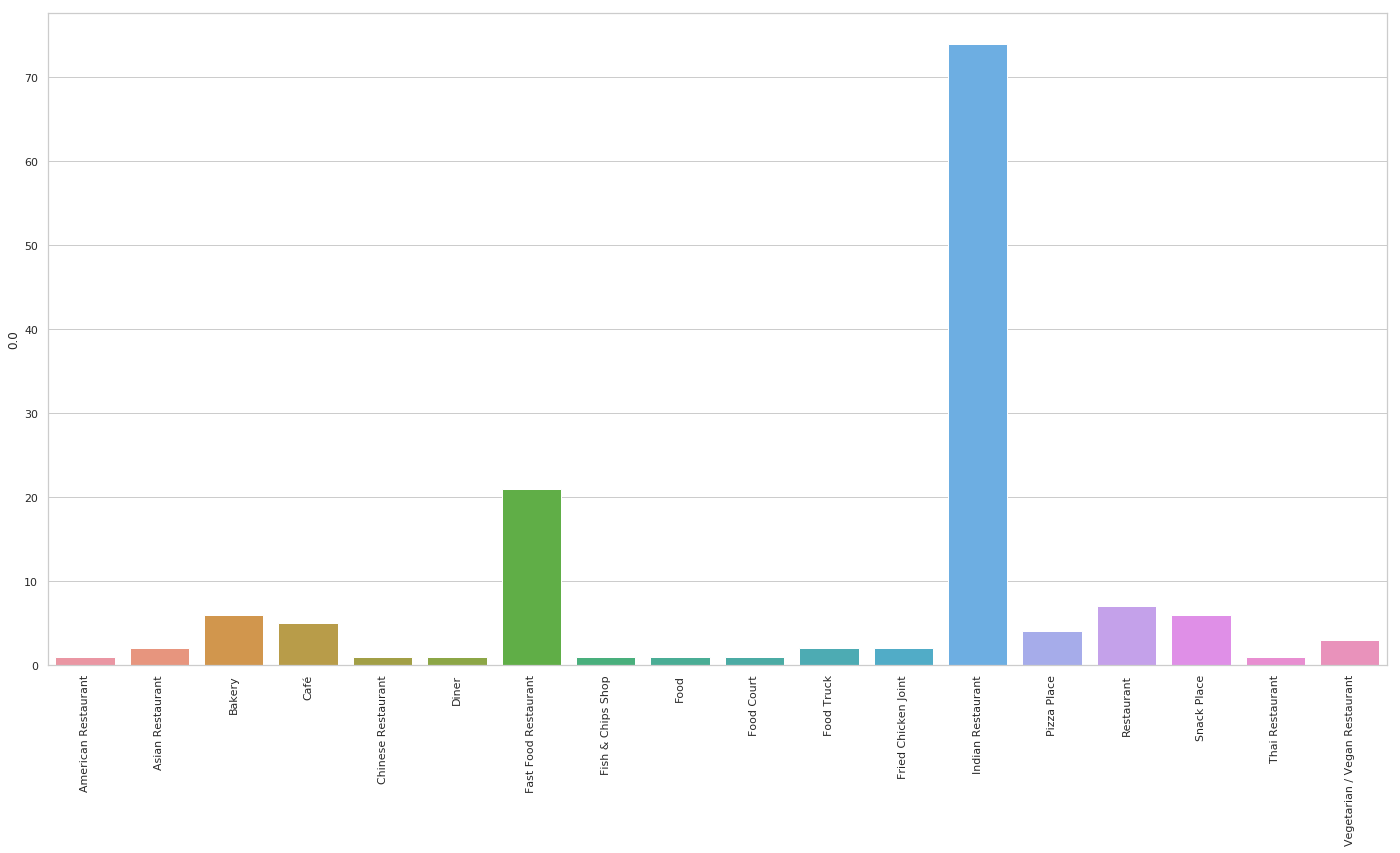

In [45]:
plot_bar(0)

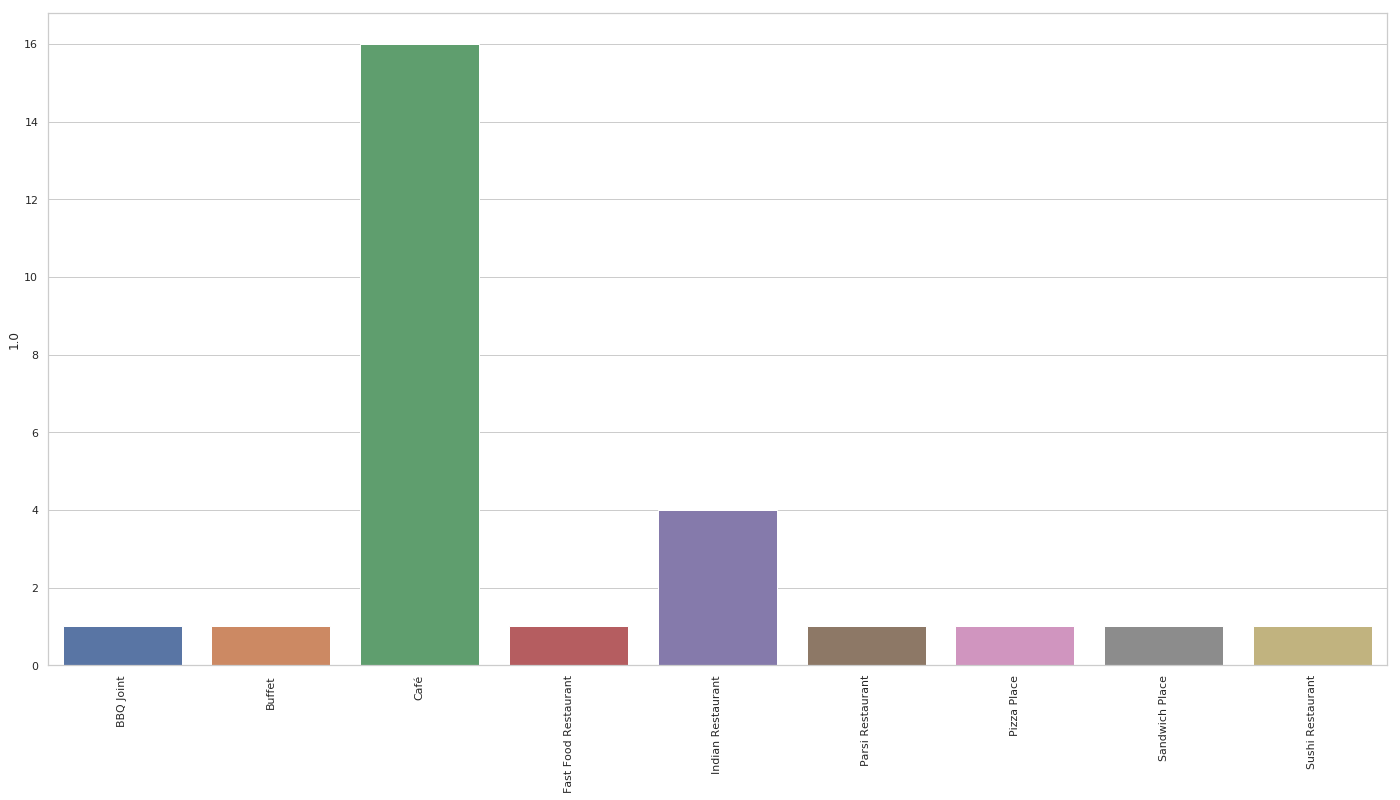

In [46]:
plot_bar(1)

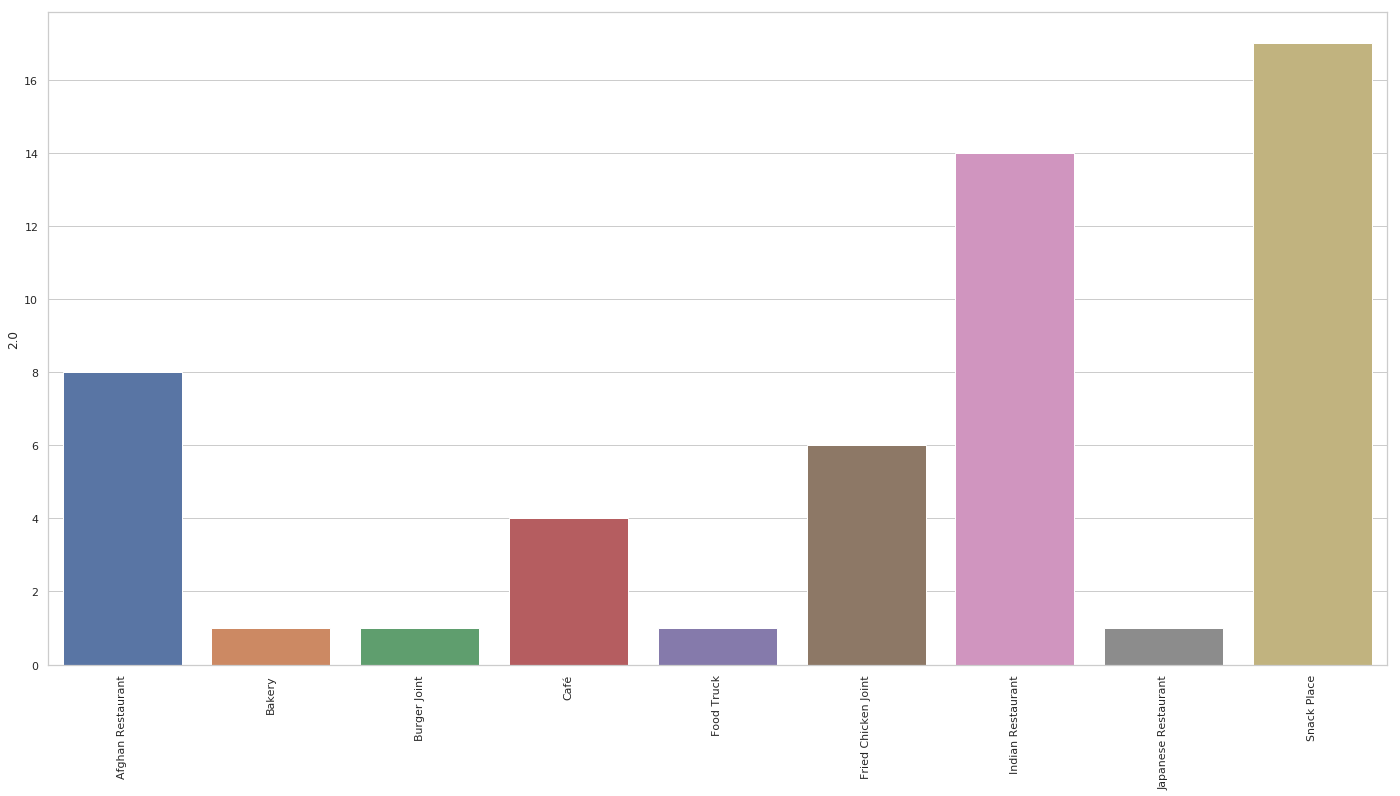

In [47]:
plot_bar(2)

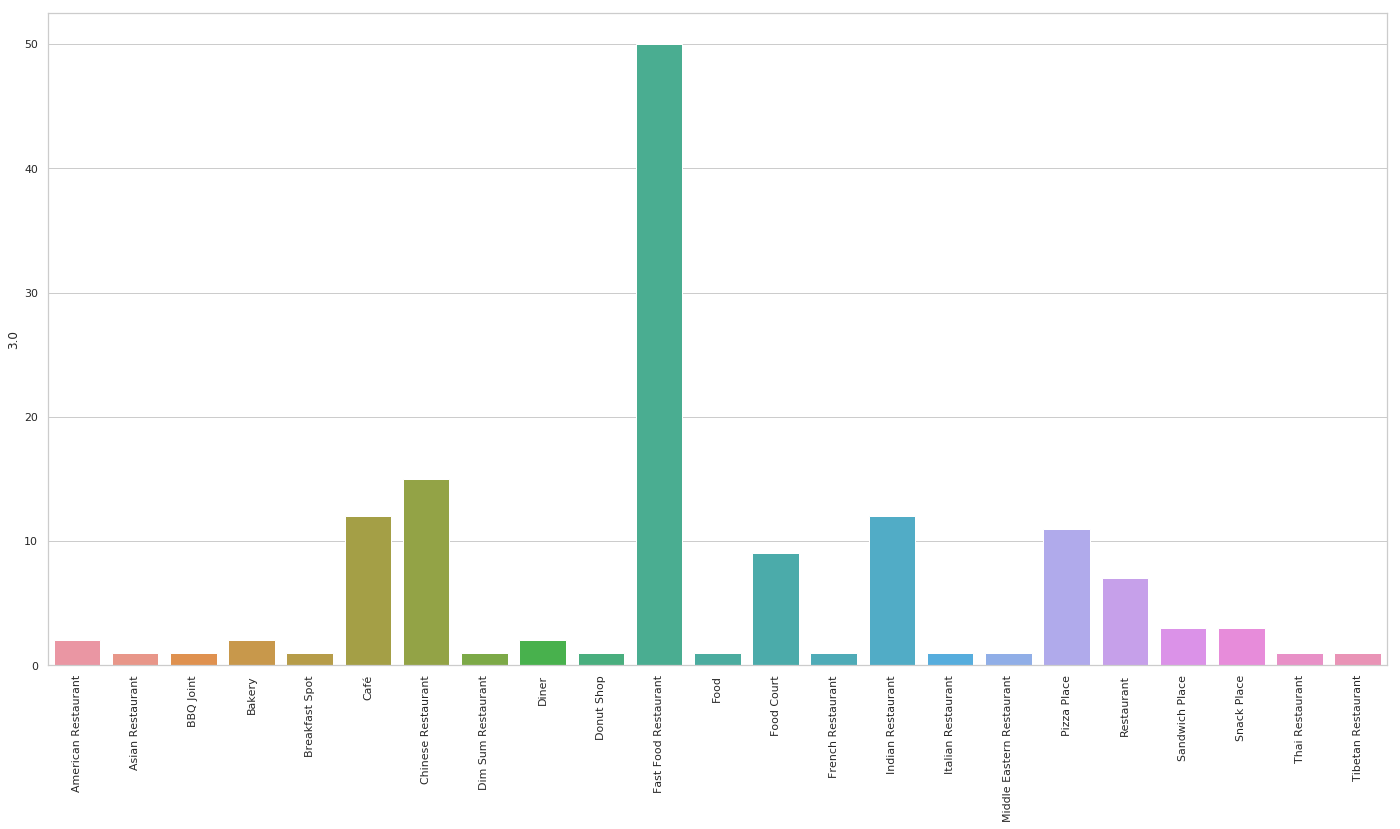

In [96]:
plot_bar(3)

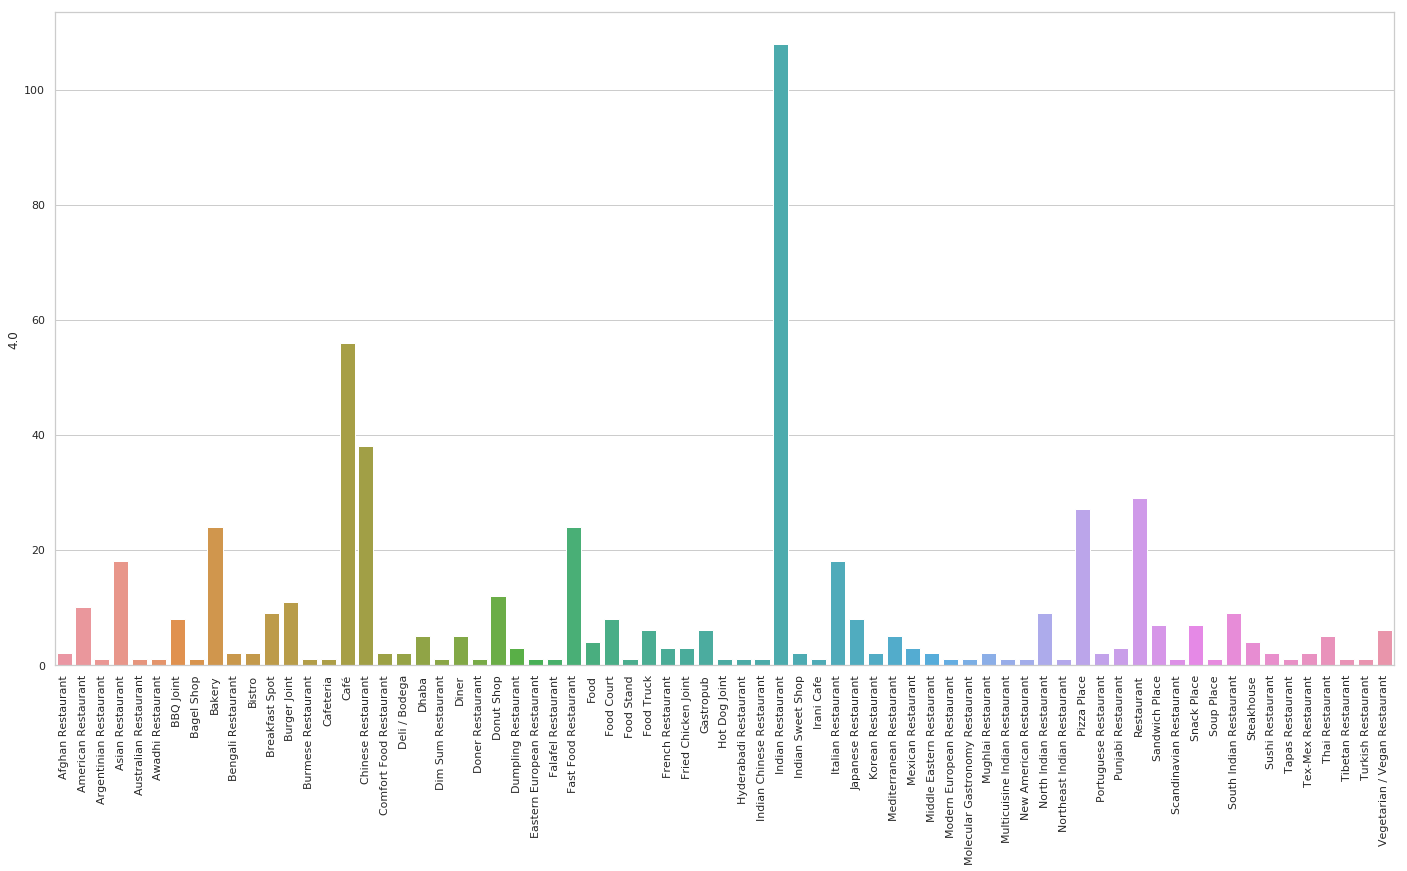

In [48]:
plot_bar(4)

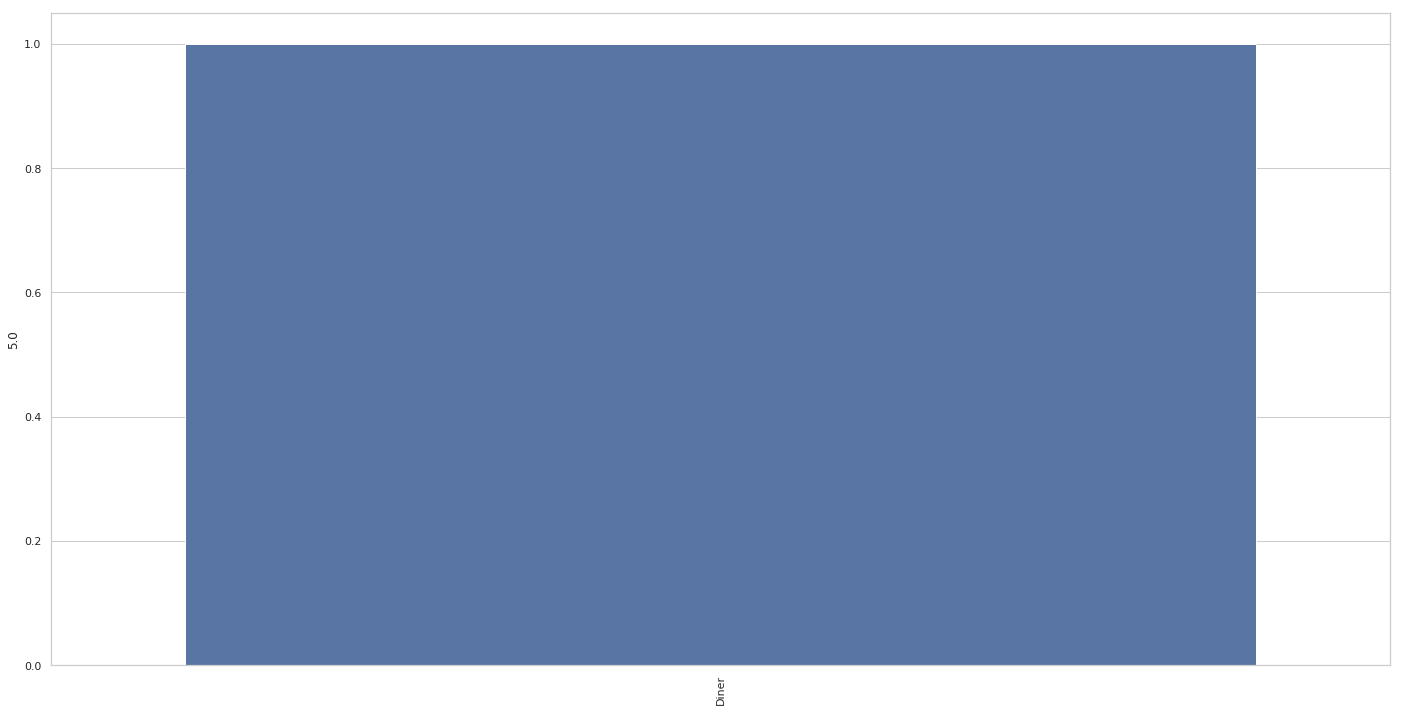

In [49]:
plot_bar(5)

**These 5 clusters will be analyzed by putting a constraint of Indian / other restaurants to arrive at the right location for Indian Multi Cuisine retaurant**

1.  Frequency/ Density of the Indian Restaurants in each neighborhood. Avoid neighborhoods with >30% density of Indian Restaurants
2.  Filter out the  neighborhoods > 70 percentile of density for non Indian Restaurants. Avoid neighborhoods having very high density of 
    Restaurants.
3.  Zero on to the most popular neighborhoods 
4.  Examine remaining neighborhoods which are close to popular neighborhoods and have less supply of Indian Restaurants
5.  Finally zero on to the top neighborhoods for a new restaurant where demand supply gap exists and is closer to popular neighborhoods.

**Focus on Clusters with mximum number of Indian Restaurants - Clusters 2 and 3.** 

In [50]:
Delhi_Venues.drop('Unnamed: 0',axis=1,inplace=True)

In [51]:
Delhi_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Tilak Nagar,28.636548,77.096496,McDonald's,28.636260,77.097104,Fast Food Restaurant
1,Tilak Nagar,28.636548,77.096496,McDonald's,28.639403,77.096502,Fast Food Restaurant
2,Tilak Nagar,28.636548,77.096496,McDonald's,28.636471,77.097160,Restaurant
3,Tilak Nagar,28.636548,77.096496,Aggarwal Restaurant,28.636747,77.097177,Indian Restaurant
4,Tilak Nagar,28.636548,77.096496,Grillz Jail Road,28.635471,77.097031,Fast Food Restaurant


**Heatmap of the venues** 

In [52]:
heatmap= Delhi_Venues.copy()
#Merging the Cluster Labels
heatmap=pd.merge(heatmap, Delhi_merged[['Neighborhood','Cluster_Labels']], left_on='Neighborhood', right_on='Neighborhood', how='inner')
heatmap.drop(heatmap[~heatmap['Cluster_Labels'].isin([0,4])].index, inplace=True)
heatmap.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Cluster_Labels
4,Ashok Vihar,28.699453,77.184826,Nat Khat Caterers,28.699630,77.187832,Indian Restaurant,0.0
5,Ashok Vihar,28.699453,77.184826,Bakers Stop,28.700495,77.188716,Bakery,0.0
6,Ashok Vihar,28.699453,77.184826,Invitation Banquet,28.696018,77.185953,Diner,0.0
7,Ashok Vihar,28.699453,77.184826,Gola Northend,28.701242,77.189288,Indian Restaurant,0.0
8,Azadpur,28.707657,77.175547,jungrele,28.705655,77.172069,Argentinian Restaurant,4.0


In [53]:
from folium.plugins import HeatMap
#heat map of all restaurants in selected Neighborhoods
res_heat_map = folium.Map(location=[latitude, longitude], zoom_start=11)
HeatMap(list(zip(heatmap['Venue Latitude'],heatmap['Venue Longitude'])),
        min_opacity=0.2,
        radius=10, blur=15,
        max_zoom=1
       ).add_to(res_heat_map)
for lat, lng, label in zip(heatmap['Neighborhood Latitude'], heatmap['Neighborhood Longitude'], heatmap['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=2,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(res_heat_map)
res_heat_map

In [134]:
Indian_restaurants = heatmap[heatmap['Venue Category']=='Indian Restaurant']

# heat map for Indian Restaurants in the selected Neighborhoods
heat_map_Indian_restaurants = folium.Map(location=[latitude, longitude], zoom_start=11)
HeatMap(list(zip(Indian_restaurants['Venue Latitude'],Indian_restaurants['Venue Longitude'])),
        min_opacity=0.2,
        radius=10, blur=15,
        max_zoom=1
       ).add_to(heat_map_Indian_restaurants)
for lat, lng, label in zip(Indian_restaurants['Neighborhood Latitude'], Indian_restaurants['Neighborhood Longitude'], Indian_restaurants['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=2,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(heat_map_Indian_restaurants )
heat_map_Indian_restaurants 

**Filter out all neighborhoods based on the following conditions:**
1. Number of Indian restaurants >30% (avoid neighborhoods with large number of Indian Restaurants)
2. Number of all restaurants >60% (avoid neighborhoods with large number of non Indian Restaurants i.e. other Types)

In [54]:
# Get the total count of Reataurants
Total_no_Restaurants = heatmap[['Neighborhood','Venue']].groupby('Neighborhood').count().sort_values(by='Venue')
Restaurants60plus = int(0.6*len(Total_no_Restaurants)) # 60 percent other restaurants
print(Total_no_Restaurants.iloc[Restaurants60plus])
Total_no_Restaurants.drop(Total_no_Restaurants[Total_no_Restaurants.Venue.values>7].index,inplace=True)
Total_no_Restaurants.columns=['Total No of Restarants']
Total_no_Restaurants.head()

Venue    6
Name: Janakpuri, dtype: int64


,Total No of Restarants
Neighborhood,
Timarpur,1
Rithala,1
Roshanara Bagh,1
Pragati Maidan,1
Vivek Vihar,1


In [55]:
# get the number of Indian restaurants
Indian_Restaurants_No = heatmap[heatmap['Venue Category']=="Indian Restaurant"][['Neighborhood','Venue']].groupby('Neighborhood').count().sort_values(by='Venue')
Indian25plus = int(0.3*len(Indian_Restaurants_No))
print(Indian_Restaurants_No.iloc[Indian25plus])
Indian_Restaurants_No.drop(Indian_Restaurants_No[Indian_Restaurants_No.Venue.values>1].index,inplace=True)
Indian_Restaurants_No.columns = ['No of Indian Restaurants']
Indian_Restaurants_No.head()

Venue    1
Name: Bali Nagar, dtype: int64


,No of Indian Restaurants
Neighborhood,
Vivek Vihar,1
Kishangarh Village,1
Krishna Nagar,1
Lajpat Nagar,1
Inderpuri,1


In [56]:
Low_Ind_restaurants = Total_no_Restaurants.join(Indian_Restaurants_No) # venues with low no of Indian restorants 
Low_Ind_restaurants.index.values

array(['Timarpur', 'Rithala', 'Roshanara Bagh', 'Pragati Maidan',
       'Vivek Vihar', 'Sant Nagar', 'Geeta Colony', 'Inderpuri',
       'Yamuna Vihar', 'INA Colony', 'Brij Puri', 'Naveen Shahdara',
       'Moti Bagh', 'Ghitorni', 'Jhilmil Colony', 'Pandav Nagar',
       'Khanpur', 'Kishangarh Village', 'Jhandewalan', 'Pitam Pura',
       'Meera Bagh', 'Naraina', 'Jasola', 'Netaji Nagar',
       'Rajouri Garden', 'Mehrauli', 'Nizamuddin West', 'Gulmohar Park',
       'Ashok Vihar', 'Azadpur', 'Daryaganj', 'Bali Nagar',
       'Vasundhara Enclave', 'Barakhamba Road', 'Rangpuri', 'Patparganj',
       'Munirka', 'Keshav Puram', 'Dilshad Garden', 'Chawri Bazaar',
       'Anand Vihar', 'Moti Nagar', 'Lodi Colony', 'Hauz Khas',
       'Civil Lines', 'Laxmi Nagar', 'Janakpuri', 'Mahipalpur',
       'Krishna Nagar', 'Shakarpur', 'Kailash Colony', 'East of Kailash',
       'Shahpur Jat'], dtype=object)

In [57]:
# Initial Selected Neighborhoods for location of new Indian reestautant
Selected_Neighbourhood = Delhi_Data.copy()# after dropping low density Neighborhoods
Selected_Neighbourhood.drop(Selected_Neighbourhood[~Selected_Neighbourhood['Neighborhood'].isin(Low_Ind_restaurants.index.values)].index, inplace=True)
Selected_Neighbourhood.head()

,Borough,Neighborhood,latitude,longitude
1,North West Delhi,Ashok Vihar,28.699453,77.184826
2,North West Delhi,Azadpur,28.707657,77.175547
7,North West Delhi,Keshav Puram,28.688926,77.161683
12,North West Delhi,Pitam Pura,28.703268,77.132250
14,North West Delhi,Rithala,28.720806,77.107181


**The new Selected Neighborhoods should be in proximity to popular neighborhoods of Delhi**

In [58]:
#most popular neighborhoods of Delhi four in no
popular_neighborhoods = Delhi_Venues[['Neighborhood','Venue']].groupby('Neighborhood').count().sort_values(by='Venue', ascending=False).head(3).index.values
popular_neighborhoods

array(['Connaught Place', 'Khirki Village', 'Hauz Khas Village'],
      dtype=object)

In [59]:
# Latitude and Longitude cordinates of Popular Neighbourhoods
popular_neighborhoods_ll = Delhi_Data[['Neighborhood','latitude','longitude']][Delhi_Data['Neighborhood'].isin(popular_neighborhoods)].reset_index()
popular_neighborhoods_ll

,index,Neighborhood,latitude,longitude
0,61,Connaught Place,28.631383,77.219792
1,99,Hauz Khas Village,28.553855,77.194713
2,107,Khirki Village,28.529885,77.218077


In [127]:
from math import sin, cos, sqrt, atan2, radians # To calulate the trrignometriccal functions

def distanceInKM(la1,lo1,la2,lo2): # We will pass the lat and Long cordinates to find the distance
   
    R = 6371.0    # approximate radius of earth in kms
    
    lat1 = radians(la1) # it has to be radians not degrees (2*PI radians is equal to 360 degrees)
    lon1 = radians(lo1)
    lat2 = radians(la2)
    lon2 = radians(lo2)
    

    dlon = lon2 - lon1 # calculate diff in longitudes in radians
    dlat = lat2 - lat1  # Calculate diff in latitude in radians

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2 # using the HAVSERSINE Formula for spherical surfaces
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    dis = R * c
    return round(dis,4)

print("Result:", distanceInKM(popular_neighborhoods_ll.iloc[2]['latitude'],popular_neighborhoods_ll.iloc[2]['longitude'],popular_neighborhoods_ll.iloc[0]['latitude'],popular_neighborhoods_ll.iloc[0]['longitude']))

Result: 11.2872


In [60]:
Selected_Neighbourhood.reset_index(inplace=True)

In [61]:
Selected_Neighbourhood.drop(columns=['index','Borough'], inplace=True)

In [126]:
Selected_Neighbourhood.head()

,Neighborhood,latitude,longitude
0,Ashok Vihar,28.699453,77.184826
1,Azadpur,28.707657,77.175547
2,Keshav Puram,28.688926,77.161683
3,Pitam Pura,28.703268,77.132250
4,Rithala,28.720806,77.107181


In [128]:
for i in popular_neighborhoods_ll.index:
    Selected_Neighbourhood[popular_neighborhoods_ll.iloc[i]['Neighborhood']] = Selected_Neighbourhood.apply(lambda x : distanceInKM(popular_neighborhoods_ll.iloc[i]['latitude'],popular_neighborhoods_ll.iloc[i]['longitude'],x['latitude'],x['longitude']),axis=1)

In [149]:
Selected_Neighbourhood.head()

,Neighborhood,latitude,longitude,Connaught Place,Hauz Khas Village,Khirki Village
0,Ashok Vihar,28.699453,77.184826,8.3024,16.2185,19.1324
1,Azadpur,28.707657,77.175547,9.5166,17.2040,20.1985
2,Keshav Puram,28.688926,77.161683,8.5492,15.3614,18.5216
3,Pitam Pura,28.703268,77.132250,11.6979,17.6972,21.0209
4,Rithala,28.720806,77.107181,14.8177,20.4353,23.8295


In [129]:
# top 5 neighborhoods near Connaught Place
Top5_NN_CP = Selected_Neighbourhood.sort_values(by=['Connaught Place']).iloc[:,:3].head().set_index('Neighborhood')
Top5_NN_CP

,latitude,longitude
Neighborhood,,
Barakhamba Road,28.629589,77.225138
Brij Puri,28.629669,77.232045
Chawri Bazaar,28.649265,77.226515
Pragati Maidan,28.623475,77.242528
Jhandewalan,28.644319,77.199917


In [130]:
# top 5 neighborhoods near Hauz Khas Village
Top5_NN_HK = Selected_Neighbourhood.sort_values(by=['Hauz Khas Village']).iloc[:,:3].head().set_index('Neighborhood')
Top5_NN_HK

,latitude,longitude
Neighborhood,,
Hauz Khas,28.544256,77.206707
Gulmohar Park,28.557101,77.213006
Shahpur Jat,28.548330,77.214104
Munirka,28.554886,77.171084
Netaji Nagar,28.573534,77.186359


In [131]:
# top 5 neighborhoods near Khirki Village
Top5_NN_Khirki = Selected_Neighbourhood.sort_values(by=['Khirki Village']).iloc[:,:3].head().set_index('Neighborhood')
Top5_NN_Khirki

,latitude,longitude
Neighborhood,,
Hauz Khas,28.544256,77.206707
Shahpur Jat,28.548330,77.214104
Khanpur,28.512798,77.232395
Gulmohar Park,28.557101,77.213006
Kailash Colony,28.553052,77.242969


In [132]:
#Putting all selected neighborhoods together
Final_Selected=Top5_NN_CP.append(Top5_NN_HK).append(Top5_NN_Khirki).reset_index()
Final_Selected.drop_duplicates(inplace=True)
Final_Selected.reset_index(inplace=True)
Final_Selected.drop(columns=['index'], inplace=True)
Final_Selected

,Neighborhood,latitude,longitude
0,Barakhamba Road,28.629589,77.225138
1,Brij Puri,28.629669,77.232045
2,Chawri Bazaar,28.649265,77.226515
3,Pragati Maidan,28.623475,77.242528
4,Jhandewalan,28.644319,77.199917
5,Hauz Khas,28.544256,77.206707
6,Gulmohar Park,28.557101,77.213006
7,Shahpur Jat,28.548330,77.214104
8,Munirka,28.554886,77.171084
9,Netaji Nagar,28.573534,77.186359


**FINAL RECOMMENDATIO TO SETUP An INDIAN MULTI-CUISINE RESTAURANT**

In [133]:
final_map = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(Final_Selected['latitude'], Final_Selected['longitude'], Final_Selected['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(final_map)  
    
final_map


**The recommended locations are shown on the map as three clusters** 

### Conclusion

1.  Total Delhi Neighborhoods selected were 165 with 849 Reataurants within radius of 0.5 kms.   
2.  The neighbourhoods were further clustered or segmented on the number of restaurants and type of Restaurants i.e. French, Fastfood,   
    Italian, Indian, Thai and Japanese etc.;  116 neighborhood with 75 categories
3.  Finally using K-Means algorithm 5 clusters were obtained.
4.  Each of these clusters had a good variety of Restarants e.g Italian, Afghani, Australian etc.; 
5.  Out of these clusters we further selected the clusterss with high density of Indian Restaurants.
6.   The clustes had following distributions  
---
        | Cluster |  No of Indian Restaurants|
        |:-------:|:------------------------:| 
        |    0    |           5              |
        |    1    |          10              |
        |    2    |          75              |
        |    3    |         125              |
        |    4    |           1              |
        |    5    |           0              |

---
     
 7. Based on high density of Indian restaurants The clusters 2 and 3 were selected for analysis. 
 8. Created a Heatmap to anlyze the density of restaurants in other neighborhoods.
    selected 56 neighborhoods with low density of Indian restaurants as well as low density of total retaurants.  
 9. Finally selected Top 3 most popular neighborhoods i.e. Canaught Place (new name Rajiv Chowk), Hauz Khas village and Khirki Village. 
 10. Next selected Top 5 neighborhoods around these
 11. The data in row 10 above was added together finally to arrive at 12 Neighborhoods that fulfil the business objective of setting up a 
     new restaurant
 
**Limitations of the results**
 The results may have lot of inacuracies because of:   
1. The dataset is very small. I tried with k=3,4,5,6 and 7 but the results are mostly same with no change in final neighborhoods.
   To get better results we need a larger database of restaurants.
2. NCR the region in and around Delhi has 5000 restaurants listed on Zomato but we could find data only for 849. 
3. Few neighborhoods (15 of them) Latitude and Longitude were beyond Delhi's lat long and  had to be dropped
4. Foursquare API does not have the most recent information on all neighborhoods in the city of Delhi
5. The initial 100 venues selected from foursquare is very less for a city like Delhi with a population of 20 million plus.
6. Inspite of all the constraints the project is successful.

**References**
1. Wikipedia page Neighborhoods of Delhi-https://en.wikipedia.org/wiki/Neighbourhoods_of_Delhi
2. Coursera course Notes by Alex Aklson
3. https://www.kaggle.com/shrutimehta/zomato-restaurants-data
4. zomato restaurants dataset and projet on neighborhoods in the city of New Delhi by Zayed Rais
5. Restaurant Location Recommender by Kumar Shashwat
6. The projects on Toronto Neighborhood Analysis submitted as part of this course
7. Finally the Discussion Forum was a great help. Thank you to eachone on the discusion Forum.

# The End